In [10]:
import os
import matplotlib.pyplot as plt
import librosa, librosa.display
import IPython.display as ipd
import numpy as np
from sklearn import preprocessing
import crepe
from scipy.io import wavfile
plt.rcParams['figure.figsize']=[20,10]
plt.rcParams.update({'font.size':10})

In [11]:
basee="./audio/"
a=basee+'alap1.wav'
ipd.Audio(a)

In [12]:
voice, sr = librosa.load(a)

In [13]:
base='./Sargam1/'
sa = base+"sargam0.wav"
re = base+"sargam1.wav"
ga = base+"sargam2.wav"
ma = base+"sargam3.wav"
pa = base+"sargam4.wav"
da = base+"sargam5.wav"
ni = base+"sargam6.wav"
saa = base+"sargam7.wav"

In [14]:
voice_sa, _ = librosa.load(sa)
voice_re, _ = librosa.load(re)
voice_ga, _ = librosa.load(ga)
voice_ma, _ = librosa.load(ma)
voice_pa, _ = librosa.load(pa)
voice_da, _ = librosa.load(da)
voice_ni, _ = librosa.load(ni)
voice_saa, _ = librosa.load(saa)

In [15]:
def limitFreq(freq,size):
    for i,j in enumerate(freq):
        if j>size:
            return i 
            
def remove_till_limit(Xaxis,limit,maxBins):
    newX=[]
    for i in Xaxis[:maxBins]:
        if i<limit:
            newX.append(0)
        else:
            newX.append(i)
    return newX

def getFundamental(Xaxis,bins):
    for i,j in enumerate(Xaxis[1:bins]):
        if j>0:
            return i

In [16]:
def getAllFrequency(Xaxis,bins): 
    harmonics = []
    for i,j in enumerate(Xaxis[1:bins]):
        if j>0:
            harmonics.append(round(j))
    return harmonics

In [17]:
def getIndexofFunda(f,funda):
    for i,j in enumerate(f):
        if j==funda:
            return i+1

In [18]:
def pitchEstimator(path):
    sr, audio = wavfile.read(path)
    time, frequency, confidence, activation = crepe.predict(audio, sr, viterbi=True,step_size=100)
    lis=[]
    for i,j in enumerate(confidence): 
        if j > 0.92:
            lis.append(i)
    val=[frequency[i] for i in lis]
    return sum(val)/len(val)

In [19]:
pitch=round(pitchEstimator('./audio/alap1.wav'))

2/2 [==============================] - 1s 423ms/step


In [21]:
print("Fundamental Frequency (Pitch) is ",pitch)

Fundamental Frequency (Pitch) is  139


In [22]:
def getIndxTill(end,freq,indx,gap):
    for i in range(indx,len(freq)):
        max=end*gap
        if freq[i]>max:
            indx=i
            return indx
        
def getMaxPow(start,end,Yaxis):
    if sum(Yaxis[start:end])!=0:
        return max(Yaxis[start:end])
    else:
        return 0

In [23]:
def findCoordinates(path,voice,i=0):
    X = np.fft.fft(voice)
    X_mag = np.absolute(X)
    power_spectrum = np.square(X_mag)
    f = np.linspace(0, sr, len(power_spectrum))
    f_bins=limitFreq(f,2000)
    
    newX_mag=remove_till_limit(power_spectrum,1000,f_bins) 
    pitch=round(pitchEstimator(path))
    Harmonics=[]
    l=[1]
    totalSplit=int(round(2000/pitch))
    for i in range(totalSplit):
        index=getIndxTill(pitch,f,l[i],i+1) 
        l.append(index)
        Harmonics.append(getMaxPow(l[i],l[i+1],newX_mag))
    Harmonics = [i for i in Harmonics if i != 0]
    print(Harmonics) 

    if len(Harmonics)>6:
        midBand = sum(Harmonics[1:5])
        highBand = sum(Harmonics[5:])
    else:
        midBand = sum(Harmonics[1:3])
        highBand = sum(Harmonics[3:])
        
    return [midBand,highBand]

In [24]:
findCoordinates(a,voice)

2/2 [==============================] - 1s 322ms/step
[33644.88451231384, 1780894.851049973, 659547.3812550107, 101860.94816857947, 395785.09614056116, 1074063.9075481428, 110498.13689748544, 66386.60601599705, 136424.5188047195, 131285.65511382007, 6024.146239053229]


[2938088.2766141244, 1524682.970619218]

In [25]:
def plot_power_spectrum(path,voice,i):
    X = np.fft.fft(voice)
    X_mag = np.absolute(X)
    power_spectrum = np.square(X_mag)
    f = np.linspace(0, sr, len(power_spectrum))
    f_bins=limitFreq(f,2000)
    
    pitch=round(pitchEstimator(path))
    print(f"Fundamental Frequency(Pitch) is {pitch} Hz") 
    
    plt.subplot(2,4,i)
    plt.plot(f[1:f_bins], power_spectrum[1:f_bins])
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power')
    plt.title('Power Spectrum ' + f"Pitch = {pitch} Hz")

     


1/1 [==============================] - 0s 200ms/step
Fundamental Frequency(Pitch) is 136 Hz
1/1 [==============================] - 0s 229ms/step
Fundamental Frequency(Pitch) is 156 Hz
1/1 [==============================] - 0s 225ms/step
Fundamental Frequency(Pitch) is 174 Hz
1/1 [==============================] - 0s 194ms/step
Fundamental Frequency(Pitch) is 183 Hz
1/1 [==============================] - 0s 211ms/step
Fundamental Frequency(Pitch) is 208 Hz
1/1 [==============================] - 0s 211ms/step
Fundamental Frequency(Pitch) is 234 Hz
1/1 [==============================] - 0s 213ms/step
Fundamental Frequency(Pitch) is 263 Hz
1/1 [==============================] - 0s 172ms/step
Fundamental Frequency(Pitch) is 273 Hz


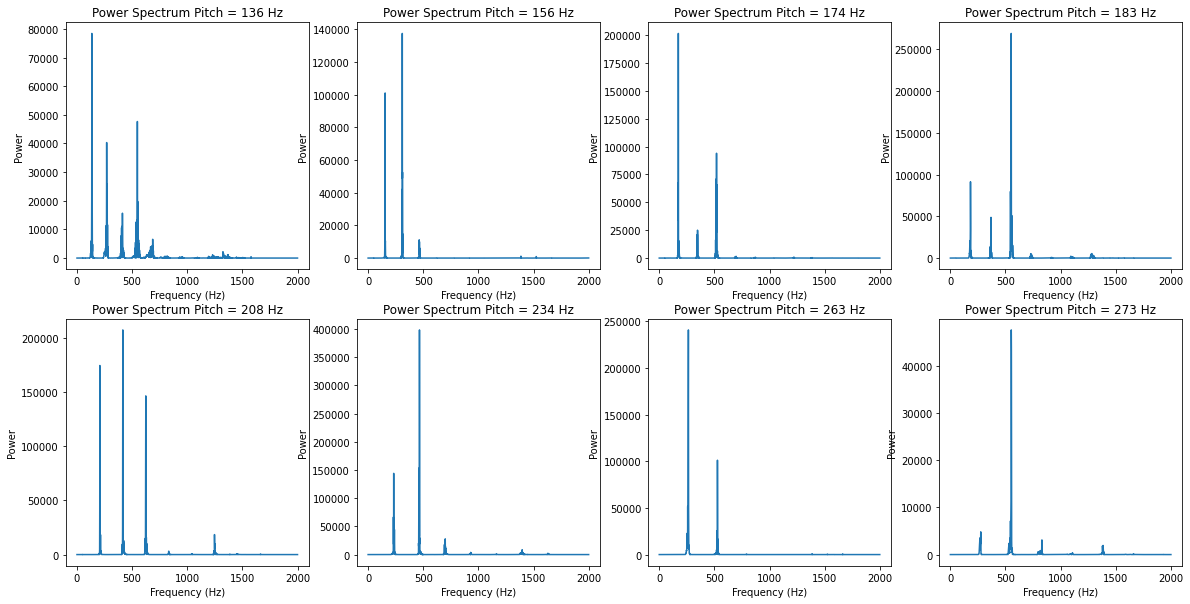

In [26]:
plot_power_spectrum(sa,voice_sa,1)
plot_power_spectrum(re,voice_re,2)
plot_power_spectrum(ga,voice_ga,3)
plot_power_spectrum(ma,voice_ma,4)
plot_power_spectrum(pa,voice_pa,5)
plot_power_spectrum(da,voice_da,6)
plot_power_spectrum(ni,voice_ni,7)
plot_power_spectrum(saa,voice_saa,8)

In [27]:
coordinates = []
coordinates.append(findCoordinates(sa,voice_sa,1))
coordinates.append(findCoordinates(re,voice_re,2))
coordinates.append(findCoordinates(ga,voice_ga,3))
coordinates.append(findCoordinates(ma,voice_ma,4))
coordinates.append(findCoordinates(pa,voice_pa,5))
coordinates.append(findCoordinates(da,voice_da,6))
coordinates.append(findCoordinates(ni,voice_ni,7))
coordinates.append(findCoordinates(saa,voice_saa,8))

1/1 [==============================] - 0s 242ms/step
[78401.13679366845, 40313.581678701594, 25823.523007544267, 15656.39650899368, 47657.56933053331, 6550.99906082042, 2203.841125153836, 1210.6877013143232]
1/1 [==============================] - 0s 251ms/step
[100970.3553728068, 137391.78203130036, 52479.87789660291, 6039.316967858214, 1154.632060027095]
1/1 [==============================] - 0s 281ms/step
[201592.88997669888, 79465.33853114831, 94052.44414470546, 65860.52579671703, 1565.9433125420044]
1/1 [==============================] - 0s 203ms/step
[33952.94346178475, 91390.79448653627, 79825.08486140751, 269155.8140338239, 4377.8509708558, 2062.1946393974713, 4584.1373500758245, 5393.154463005801]
1/1 [==============================] - 0s 265ms/step
[39942.44967539107, 174382.14563113436, 207177.6641632291, 146334.51114939904, 3128.38032230689, 18441.53020921256, 9939.648660477642]
1/1 [==============================] - 0s 247ms/step
[144021.90459145012, 398314.2369236469, 2917

In [28]:

print(coordinates)


[[129451.07052577286, 9965.52788728858], [189871.65992790327, 7193.949027885309], [173517.78267585376, 67426.46910925904], [444749.54435262346, 12039.486452479097], [531022.7012660694, 28381.1788696902], [440292.72998659004, 11016.218668060636], [342034.64640429936, 0], [54642.795735212734, 5028.409483700462]]


In [29]:
X = np.array(coordinates)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_x = min_max_scaler.fit_transform(X)
print(scaled_x)

[[0.15703491 0.14779845]
 [0.28386769 0.10669325]
 [0.24953821 1.        ]
 [0.81889841 0.17855727]
 [1.         0.42092044]
 [0.80954282 0.16338122]
 [0.6032829  0.        ]
 [0.         0.07457619]]


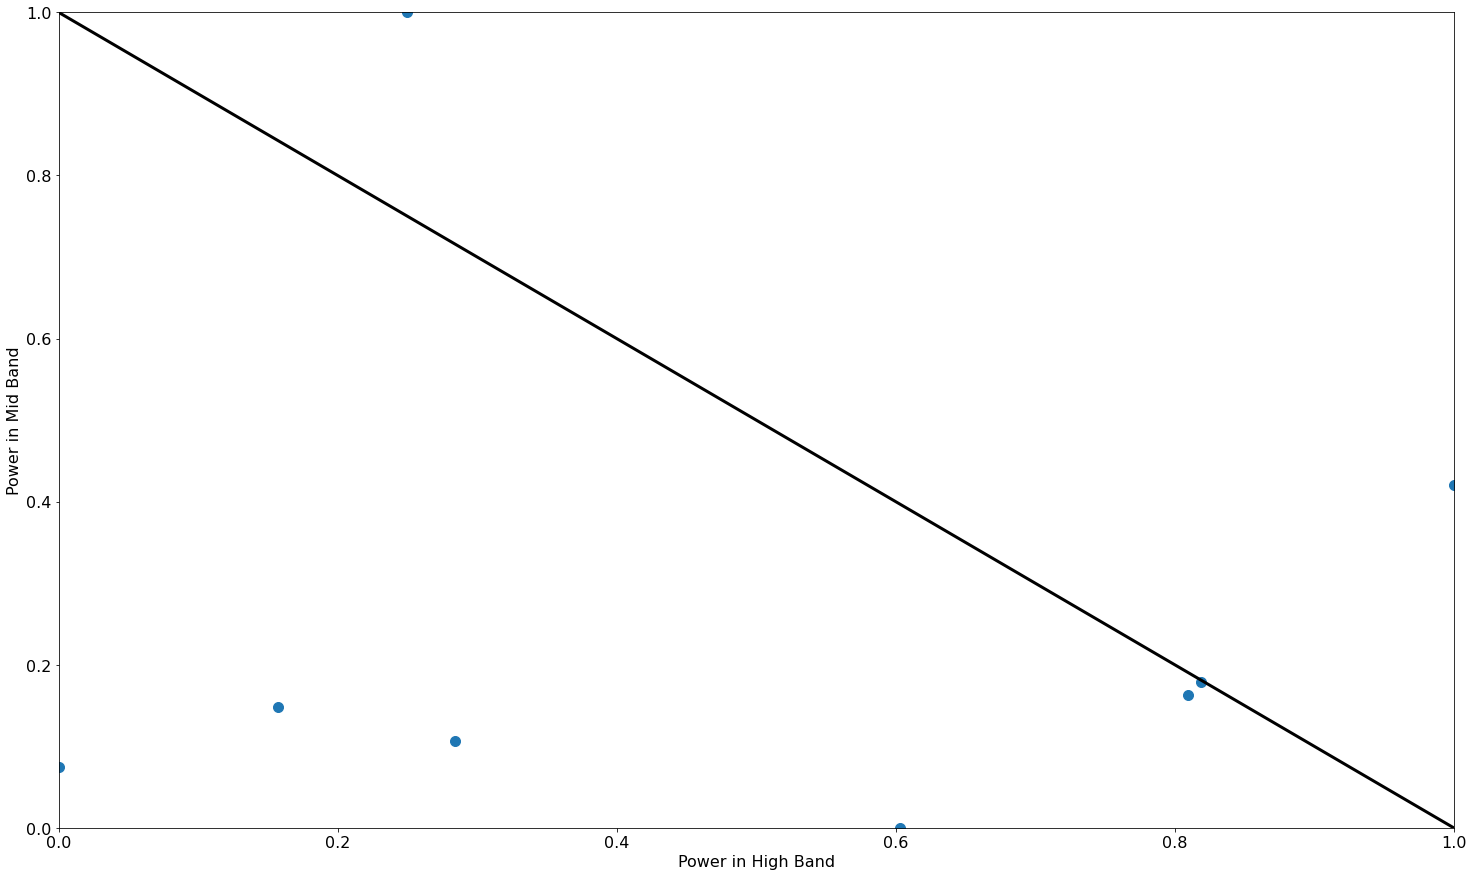

In [30]:
data = np.array(scaled_x)
x, y = data.T
plt.figure(figsize=(25, 15))  
plt.rcParams['font.size'] = '16'

data = np.array(scaled_x)
x, y = data.T
plt.xlabel('Power in High Band')
plt.ylabel('Power in Mid Band')
plt.plot([1,0],[0,1], 'k-',linewidth=3)
plt.scatter(x, y,s=100)
plt.xlim(0,1)
plt.ylim(0,1)
 

plt.show()

In [ ]:
from pydub import AudioSegment
from pydub.silence import split_on_silence
import shutil,os 

#reading from audio mp3 file
sound = AudioSegment.from_wav(a1)

# spliting audio files
audio_chunks = split_on_silence(sound, min_silence_len=200, silence_thresh=-40 )

#loop is used to iterate over the output list
for i, chunk in enumerate(audio_chunks):
    output_file = "sargam{0}.wav".format(i)
    print("Exporting file", output_file) 